# Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
ds = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Data Preprocessing

In [3]:
ds.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
ds.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
ds=ds[ds['bmi'].notnull()]

In [6]:
(ds['stroke'] == 1).sum()

np.int64(209)

In [7]:
(ds['stroke']==0).sum()

np.int64(4700)

In [8]:
X = ds.iloc[:,1:-1].values
Y = ds.iloc[:,-1].values

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
LE = LabelEncoder()

In [11]:
X[:,0]= LE.fit_transform(X[:,0])

In [12]:
X[:,4]= LE.fit_transform(X[:,4])

In [13]:
X[:,6]= LE.fit_transform(X[:,6])

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[5,9])],remainder='passthrough')

In [16]:
X = ct.fit_transform(X)

In [17]:
X.shape

(4909, 17)

### I have used SMOTE here as the DataSet was not balanced and there were more instances of 'Not Stroke' than 'Stroke'

In [18]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X, Y = sm.fit_resample(X, Y)

In [19]:
from sklearn.model_selection import train_test_split as tts

In [20]:
Xtrain,Xtest,Ytrain,Ytest = tts(X,Y,test_size=0.25,random_state = 0)

In [21]:
x1 = X[0,:]
x2 = X[1,:]
print(x2.reshape(1,len(x2)))
print(x1.reshape(1,len(x1)))


[[  0.     0.     1.     0.     0.     0.     0.     1.     0.     1.
   80.     0.     1.     1.     0.   105.92  32.5 ]]
[[  0.     0.     1.     0.     0.     0.     1.     0.     0.     1.
   67.     0.     1.     1.     1.   228.69  36.6 ]]


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss = StandardScaler()

In [24]:
Xtrain[:,[10,15,16]] = ss.fit_transform(Xtrain[:,[10,15,16]])

In [25]:
Xtest[:,[10,15,16]]= ss.transform(Xtest[:,[10,15,16]])

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
classifierLR = LogisticRegression()

In [28]:
classifierLR.fit(Xtrain,Ytrain)

LogisticRegression()

In [29]:
YpredLR = classifierLR.predict(Xtest)

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

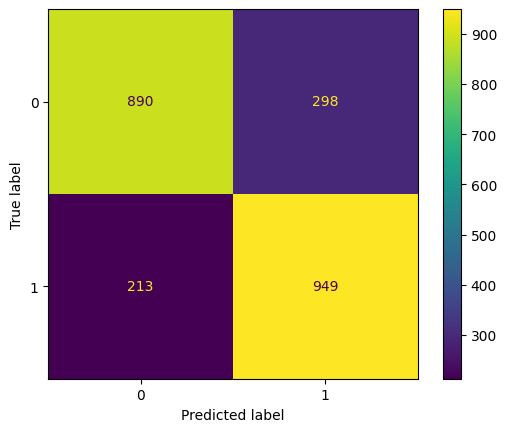

In [31]:
ConfusionMatrixDisplay.from_predictions(Ytest,YpredLR)

In [32]:
print(f'accuracy_score: {accuracy_score(Ytest,YpredLR)}')
print(classification_report(Ytest,YpredLR))

accuracy_score: 0.7825531914893618
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1188
           1       0.76      0.82      0.79      1162

    accuracy                           0.78      2350
   macro avg       0.78      0.78      0.78      2350
weighted avg       0.78      0.78      0.78      2350



## Support Vector Classification

In [33]:
from sklearn.svm import SVC

In [34]:
classifierSVC = SVC(kernel='rbf')

In [35]:
classifierSVC.fit(Xtrain,Ytrain)

SVC()

In [36]:
YpredSVC = classifierSVC.predict(Xtest)

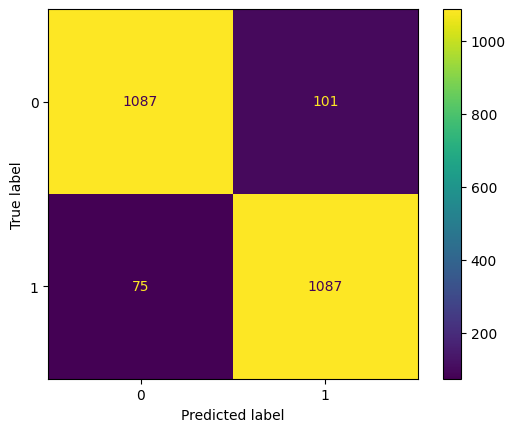

In [37]:
ConfusionMatrixDisplay.from_predictions(Ytest,YpredSVC)

In [38]:
print(f'accuracy_score: {accuracy_score(Ytest,YpredSVC)}')
print(classification_report(Ytest,YpredSVC))

accuracy_score: 0.9251063829787234
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1188
           1       0.91      0.94      0.93      1162

    accuracy                           0.93      2350
   macro avg       0.93      0.93      0.93      2350
weighted avg       0.93      0.93      0.93      2350



## Naive Bayes (GaussianNB)

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
classifierGNB = GaussianNB()

In [41]:
classifierGNB.fit(Xtrain,Ytrain)

GaussianNB()

In [42]:
YpredGNB = classifierGNB.predict(Xtest)

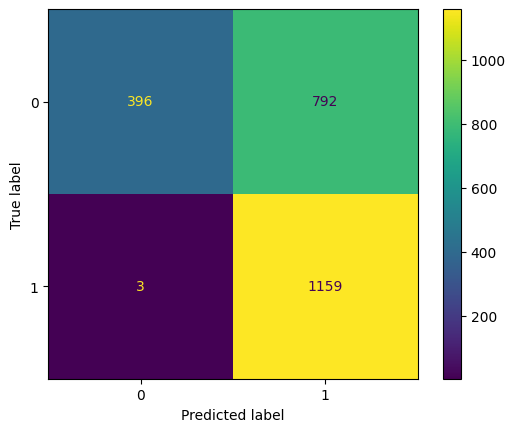

In [43]:
ConfusionMatrixDisplay.from_predictions(Ytest,YpredGNB)

In [44]:
print(f'accuracy_score: {accuracy_score(Ytest,YpredGNB)}')
print(classification_report(Ytest,YpredGNB))

accuracy_score: 0.6617021276595745
              precision    recall  f1-score   support

           0       0.99      0.33      0.50      1188
           1       0.59      1.00      0.74      1162

    accuracy                           0.66      2350
   macro avg       0.79      0.67      0.62      2350
weighted avg       0.80      0.66      0.62      2350



## K-Nearest Neighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
classifierKNN = KNeighborsClassifier(n_neighbors=5)

In [47]:
classifierKNN.fit(Xtrain,Ytrain)

KNeighborsClassifier()

In [48]:
YpredKNN = classifierKNN.predict(Xtest)

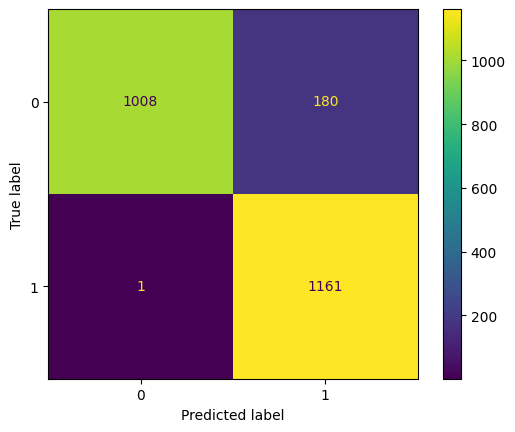

In [49]:
ConfusionMatrixDisplay.from_predictions(Ytest,YpredKNN)

In [50]:
print(f'accuracy_score: {accuracy_score(Ytest,YpredKNN)}')
print(classification_report(Ytest,YpredKNN))

accuracy_score: 0.9229787234042554
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1188
           1       0.87      1.00      0.93      1162

    accuracy                           0.92      2350
   macro avg       0.93      0.92      0.92      2350
weighted avg       0.93      0.92      0.92      2350



## Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
classifierDTC = DecisionTreeClassifier(criterion='entropy')

In [53]:
classifierDTC.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy')

In [54]:
YpredDTC = classifierDTC.predict(Xtest)

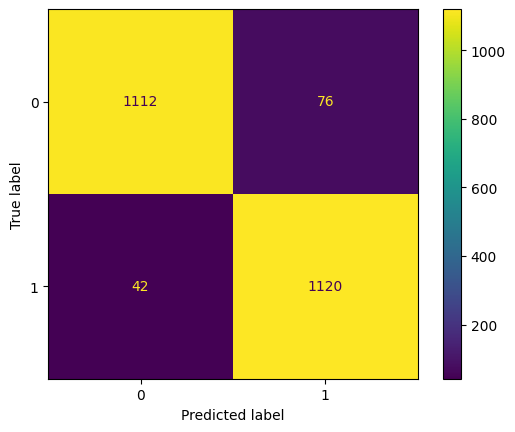

In [55]:
ConfusionMatrixDisplay.from_predictions(Ytest,YpredDTC)

In [56]:
print(f'accuracy_score: {accuracy_score(Ytest,YpredDTC)}')
print(classification_report(Ytest,YpredDTC))

accuracy_score: 0.9497872340425532
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1188
           1       0.94      0.96      0.95      1162

    accuracy                           0.95      2350
   macro avg       0.95      0.95      0.95      2350
weighted avg       0.95      0.95      0.95      2350



## Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
classifierRFC = RandomForestClassifier(n_estimators = 100)

In [59]:
classifierRFC.fit(Xtrain,Ytrain)

RandomForestClassifier()

In [60]:
YpredRFC = classifierRFC.predict(Xtest)

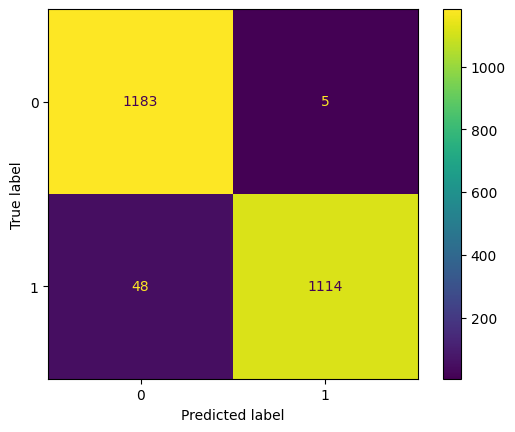

In [61]:
ConfusionMatrixDisplay.from_predictions(Ytest,YpredRFC)

In [62]:
print(f'accuracy_score: {accuracy_score(Ytest,YpredRFC)}')
print(classification_report(Ytest,YpredRFC))

accuracy_score: 0.9774468085106383
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1188
           1       1.00      0.96      0.98      1162

    accuracy                           0.98      2350
   macro avg       0.98      0.98      0.98      2350
weighted avg       0.98      0.98      0.98      2350

